# Exam II
## Travis Loebs
## November 10, 2016

Problem 1

1\. The bootstrap estimate for the median can be obtained from the sample data using the Python language. First, we will import the necessary libraries for scientific computing and data visualization.

In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we can begin the bootstrap procedure. Let $\tilde{x} = {(x_1, x_2, \dots, x_n)}^T$ be a tandom sample from $F$, where $F(x) = P(X \leq x)$. Define $\theta = t(F)$ as our target parameter, the median, of the distribution, and $\hat{\theta} = S(\tilde{x})$ as an estimator for $\theta$. Then we can draw $B$ samples of size $n$ from $\tilde{x}$, which plays the role of population, and use these $B$ samples to compute $\tilde{\theta}^* = S(\tilde{x}^*)$, which is the bootstrap replication for $\theta$. The sampling distribution of $\hat{\theta}$ is then estimated by it's bootstrap equivalent. 


This is implemented in the following code. First, we load the data set into an array (mimicking a vector), and define $n$ as the number of elements in that vector. 

In [23]:
data = np.loadtxt("/Users/AnaczLoebs/Documents/ATOM/STA6106/Exam2_pb1.txt")
n = np.size(data)

SyntaxError: EOL while scanning string literal (<ipython-input-23-95fbcb2f3901>, line 1)

Then we define $B$ as 100,000, meaning we will draw 100,000 independent bootstrap samples. For efficiency, before we begin the bootstrap algorithm we create a $B \times 1$ null matrix named 'boot_est' that will be used to store $\hat{\theta}^*$ for each sample. The bootstrap samples are then drawn by generating $n$ random integers, with replacement, from the numbers between 1 and $n$. These integers are stored in a variable labeled 'i'. Then we directly compute $\hat{\theta}^*$ as the median of the bootstrap sample. This is done by using 'np.median(data[i])', where 'data[i]' $= \tilde{x}^*_i = {(x^*_{i_1}, x^*_{i_2}, \dots, x^*_{i_n})}^T$ is the $i^{th}$ bootstrap sample.

In [3]:
B = 100000
boot_est = np.zeros((B, 1))
for b in range(0,B):
    i = np.random.randint(n, size=n)
    boot_est[b] = np.median(data[i])

We can view the histogram of our 100,000 estimates of $\hat{\theta}^*$.

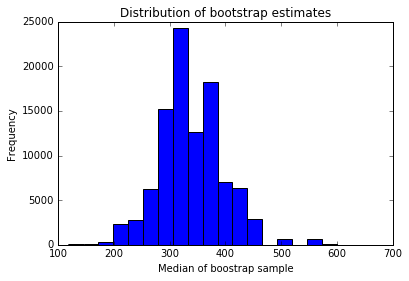

In [4]:
plt.hist(boot_est,20)
plt.xlabel('Median of boostrap sample')
plt.ylabel('Frequency')
plt.title('Distribution of bootstrap estimates')
plt.show()

The bootstrap estimate of the bias of the median of the data is defined as 

$$bias(\hat{\theta}) = E[\hat{\theta}] - \theta$$

As learned in class, we can substitute the empirical distribution $\hat{P}$ for $P$ to get the bootstrap estimate of the bias,

$$\hat{bias}(\hat{\theta}) = bias^* (\hat{\theta}^*) = {\hat{\theta}}^{*(\cdot)} - \theta^*$$

Where $\theta^* = t(\hat{P})$ is the median of our 'population' data set, and

$${\hat{\theta}}^{*(\cdot)} = \frac{1}{B} \sum_{b=1}^B {\hat{\theta}}^{* (b)}$$

This is implemented below.

In [5]:
theta_mean = np.mean(boot_est)
print("The mean of theta is %f" % theta_mean)
boot_bias = theta_mean - np.median(data)
print("The bootstrap estimate of the bias of our theta estimate is %f" % boot_bias)

The mean of theta is 339.557840
The bootstrap estimate of the bias of our theta estimate is 8.057840


The standard error of $\hat{\theta}$ is estimated by computing the standard deviation of our $B$ bootstrap replicates. Our bootstrap replicates are defined as

$$\hat{\theta}^{*(b)} = S(x^{*(b)}), \; b = 1, \dots, B$$

The standard error is computed with the formula

$$\hat{se}_{boot} (\hat{\theta}) = \bigg[ \frac{1}{B-1} \sum_{b=1}^B \big( \hat{\theta}^{*(b)} - \hat{\theta}^{*(\cdot)} {\big)}^2 {\bigg]}^{1/2}$$

Where $\hat{\theta}^{*(\cdot)} = \frac{1}{B} \sum_{b=1}^B \hat{\theta}^{*(b)}$

This is implemented in the following code using the matrix dot product to compute the sum of squares. That is, define $A$ as a $B \times 1$ matrix where the $i^{th}$ element is given by

$$A_i = \hat{\theta}^{*(i)} - \hat{\theta}^{*(\cdot)}$$

Then

$$A^T A = \sum_{b=1}^B {\big( \hat{\theta}^{*(b)} - \hat{\theta}^{*(\cdot)} \big)}^2$$

as required.

In [6]:
stdError = np.sqrt(1. / (B - 1) * np.dot(np.transpose(boot_est - theta_mean), (boot_est - theta_mean)))
print("The bootstrap estimate of the standard error is %f" % stdError)

The bootstrap estimate of the standard error is 58.407677




2\. We begin our Jackknife estimate by forming $n$ sets of $n-1$ observations, leaving out each datum in turn.

In [7]:
jack_data = np.zeros((n-1, n))
for i in range(0, n):
    jack_data[:, i] = data[np.arange(len(data))!=(i)]
print(jack_data)

[[ 157.  840.  840. ...,  840.  840.  840.]
 [ 145.  145.  157. ...,  157.  157.  157.]
 [  44.   44.   44. ...,  145.  145.  145.]
 ..., 
 [  92.   92.   92. ...,  365.  365.  365.]
 [  82.   82.   82. ...,   82.   92.   92.]
 [ 220.  220.  220. ...,  220.  220.   82.]]


We can then use these $n$ samples to estimate the bais and standard error of the mean of data. First we create an $n$-length array to store the mean of each sample and then fill it with the sample means.

In [8]:
jack_mean = np.zeros((n,1))
for i in range(0, n):
    jack_mean[i] = np.mean(jack_data[:, i])

We can compute the bias of the mean of the data by defining 

$$bias(\hat{\theta}) = E[\hat{\theta}] - \theta$$

Where $\hat{\theta}$ is the estimate for the mean of the data. The jackknife estimate of the bias is

$${\hat{bias}}_{jack}(\hat{\theta}) = (n-1) \big( \overline{\hat{\theta}{(\cdot)}} - \hat{\theta} \big)$$

Where

$$\overline{\hat{\theta}{(\cdot)}} = \frac{1}{n} \sum_{i=1}^n \hat{\theta}_{(i)}$$

is the mean of the estimates where we left out one observation, and $\hat{\theta}$ is the estimate compute from the original sample. This is implemented below.

In [9]:
jack_bias = (n - 1) * (np.mean(jack_mean) - np.mean(data))
print("The Jackknife estimate of the bias of theta hat is %f" % jack_bias)

The Jackknife estimate of the bias of theta hat is 0.000000




The Jackknife estimate for the standard error of the mean of the data set can be found by using

$$\hat{se}_{jack} = \sqrt{ {\frac{n-1}{n} \sum_{i=1}^n \Big( \hat{\theta}_{(i)} - \overline{\hat{\theta}{(\cdot)}} \Big)}^2 }$$

This is implemented below.

In [10]:
se_jack = np.sqrt((n-1) / n * np.dot(np.transpose(jack_mean - np.mean(jack_mean)), (jack_mean - np.mean(jack_mean))))
print("The Jackknife estimate for the standard error is %f." % se_jack)

The Jackknife estimate for the standard error is 50.790817.




3\. The bootstrap t-interval method for constructing confidence intervals assumes that $\hat{\theta}$ is approximately normal. We will quickly run a few tests to see if this assumption holds. First we create the histogram of the standardized bootstrap samples and compare them to the density of the standard normal distribution.

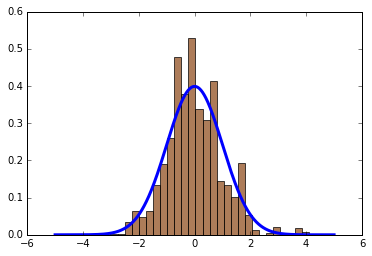

In [11]:
import matplotlib.mlab as mlab
plt.hist(((boot_est - theta_mean) / stdError), 36, normed=True, alpha = 0.7, color='saddlebrown')
x = np.linspace(-5, 5, 1000)
plt.plot(x,mlab.normpdf(x, 0, 1), lw=3, color='blue')
plt.show()

The distribution of $\hat{\theta}$ does not appear to be normal in comparison to the standard normal density. Next we use the Shapiro-Wilk test for normality. It is expected that the test will reject the null due to our large sample size. Note that the function for the Shapiro-Wilk test accepts an array with maximum size 5000, so we use only our first 5000 samples.

In [12]:
import scipy.stats as ss
ss.shapiro(boot_est[:4999])

(0.9842135310173035, 3.2763018447293376e-23)

The first number is the test statstic and the second number is the P-value associated with that statistic. Not surprisingly, the hypothesis that the data are normally distributed is rejected due to the very low P-value. Finally, we can visualize the data using a qqplot. The sample quantiles are compared with the theoretical quantiles under normality, and a reference line is shown to which the data can be compared.

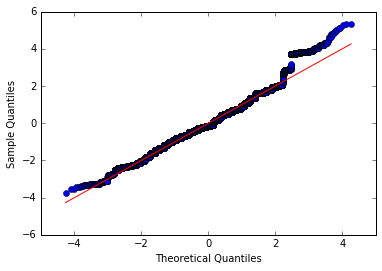

In [13]:
import statsmodels.api as sm
fig = sm.qqplot(np.asarray(boot_est.flatten()), line='s', fit=True)
plt.show()

It is seen that the tails, especially the right tail, are likely causing the departure from normality. Anyways, we will proceed with the t-interval method knowing that we must be cautious in how we use the interval.

Defining $\theta$ as the median, let $se_{x^*} (\hat{\theta})$ be an estimator of $se (\hat{\theta})$ based on the sample $x$. From the bootstrap samples $x^{*(b)}$, we calculate

$$T^{*(b)} = \frac{\hat{\theta}^{*(b)} - \hat{\theta}}{\hat{se}_{x^*} (\hat{\theta})}$$

Where $\hat{\theta}$ is the observed statistic, i.e. the median of the 'population'. Then, from the values of $T^{*(b)}$ we estimate the critical values $t_{1 - \alpha / 2}$ and $t_{\alpha / 2}$ by $\hat{t}_{1 - \alpha / 2}$ and $\hat{t}_{\alpha / 2}$, respectively as the sample quantiles from the ordered sample of replicates $T^{*(b)}$.


We implement this by first computing the observed statistic $\hat{\theta}$. For each replicate, indexed at $b=1, \dots, B$:
1. Obtain the $b^{th}$ bootstrap sample $x^{(b)}$
2. Compute $\hat{\theta}^{(b)}$ from $x^{(b)}$
3. Estimate the standard error $\hat{se} (\hat{\theta} ^{(b)})$
4. Compute the $b^{th}$ replicate of $T^{(b)} = \frac{\hat{\theta}^{*(b)} - \hat{\theta}}{\hat{se}_{x^*} (\hat{\theta})}$


In [14]:
# Compute theta_hat and find the population size
theta_hat = np.median(data)
n = np.size(data)

# Define the bootstrap sample size
B = 1000

# Define the size of the bootstrap sample used for estimating the standard error
B_sub = 1000

# Create array to store bootstrap estimates for the median and standard error of the median
boot_med = np.zeros((B, 1))
std_errb = np.zeros((B, 1))

# Create temporary variables to improve efficiency within the for-loops
temp_data = np.zeros((n, 1))
temp_med = np.zeros((B_sub, 1))


for b in range(0,B):
    i = np.random.randint(n, size=n)
    # data[i] is the ith bootstrap sample
    temp_data = data[i]
    boot_med[b] = np.median(temp_data)
    
    # Compute a separate estimate for standard error for each bootstrap sample
    for b_sub in range(0, B_sub):
        j = np.random.randint(n, size=n)
        temp_med[b_sub] = np.median(temp_data[j])
    std_errb[b] = np.sqrt(1. / (B - 1) * np.dot(np.transpose(temp_med - np.mean(temp_med)), 
                                                (temp_med - np.mean(temp_med))))

# Compute T_star as defined above
T_star = np.divide((boot_med - theta_hat), std_errb)

We can then order the sample of replicates and find the sample quantiles $\hat{t}_{1 - \alpha / 2}$ and $\hat{t}_{\alpha / 2}$. Once we have the quantiles, we compute the standard deviation of the replicates $\hat{\theta}^{(b)}$. The confidence interval is then easily computed as 

$$\big(\hat{\theta} - \hat{t}_{1 - \alpha / 2} \hat{se}(\hat{\theta}), \; \hat{\theta} - \hat{t}_{\alpha / 2} \hat{se}(\hat{\theta}) \big)$$

In [15]:
T_star = np.sort(T_star.flatten())

# Define alpha
alpha = 0.05

# Compute the estimates for the critical values
t1_star = T_star[int(np.floor((1 - alpha) * B) - 1)]
t2_star = T_star[int(np.ceil(alpha * B) - 1)]

stdError = np.sqrt(1. / (B - 1) * np.dot(np.transpose(boot_med - np.mean(boot_med)), (boot_med - np.mean(boot_med))))

# Estimate the bounds of the confidence interval
lo = theta_hat - t1_star * stdError
hi = theta_hat - t2_star * stdError

# This function just cleans up the 'print' statement below
def listToStringWithoutBrackets(list1):
    return str(list1).replace('[','').replace(']','')

print("The " + listToStringWithoutBrackets(((1 - alpha) * 100)) 
      + "% confidence t-interval for theta is (" 
      + listToStringWithoutBrackets(lo) + ", " 
      + listToStringWithoutBrackets(hi) + ").")

The 95.0% confidence t-interval for theta is ( 244.49796099,  423.67750476).




The percentile bootstrap confidence interval is somewhat easier to construct than the t interval. Let $\hat{\theta}^{(1)}, \hat{\theta}^{(2)}, \dots, \hat{\theta}^{(n)}$ be the bootstrap replicates of the statistic $\hat{\theta}$. From the empirical cumulative distribution of the replicates, we compute the $\alpha / 2$ quantile $\hat{\theta}_{\alpha / 2}$ and the $1 - \alpha / 2$ quantile $\hat{\theta}_{1 - \alpha / 2}$ and use these for our interval bounds.

In [16]:
# First sort the replicates
sorted_boot = np.sort(boot_med.flatten())

# Find the quantiles
lo = sorted_boot[int(np.floor(B * alpha))]
hi = sorted_boot[int(np.ceil(B * (1 - alpha)))]

print("The " + listToStringWithoutBrackets(((1 - alpha) * 100)) 
      + "% confidence percentile interval for theta is (" 
      + listToStringWithoutBrackets(lo) + ", " 
      + listToStringWithoutBrackets(hi) + ").")

The 95.0% confidence percentile interval for theta is (246.0, 435.0).


&nbsp;

Problem 2

We want to minimize

$$L(\beta) = \frac{1}{2n} \sum_{i=1}^n (y_i - x_i^T \beta)^2 + \lambda_1 \sum_{j=1}^p | \beta_j | + \lambda_2 \sum_{j=1}^p \beta_j^2$$

Which is of the form

$$f(x) = g(x) + \sum h_i (x_i)$$

Where 

$$g(x) = \frac{1}{2n} \sum_{i=1}^n (y_i - x_i^T \beta)^2$$

and

$$\sum h_i (x_i) = \lambda_1 \sum_{j=1}^p | \beta_j | + \lambda_2 \sum_{j=1}^p \beta_j^2$$

Because $g(x)$ is convex and differentiable, and $\sum h_i (x_i)$ is convex, we can use the coordinate descent algorithm to find the solution. First we will rewrite $L(\beta)$ as

$$L(\beta) = \frac{1}{2n} \sum_{i=1}^n (y_i - \sum x_{ij} \beta_j)^2 + \lambda_1 \sum_{j=1}^p | \beta_j | + \lambda_2 \sum_{j=1}^p \beta_j^2$$

Before we find the subgradient, we once again rewrite $L(\beta)$

$$L(\beta) = \frac{1}{2n} \sum_{i=1}^n (y_i - \sum_{k \neq j} x_{ik} \beta_k - x_{ij} \beta_j)^2 + \lambda_1 \sum_{k \neq j}^p | \tilde{\beta}_k | + \lambda_1 | \beta_j | + \lambda_2 \sum_{k \neq j}^p \beta_k^2 + \lambda_2 \beta_j^2$$

Let $r_i = y_i - \sum_{k \neq j} x_{ik} \beta_k$ be the partial residuals. Then

$$L(\beta) = \frac{1}{2n} \sum_{i=1}^n (r_i - x_{ij} \beta_j)^2 + \lambda_1 \sum_{k \neq j}^p | \tilde{\beta}_k | + \lambda_1 | \beta_j | + \lambda_2 \sum_{k \neq j}^p \beta_k^2 + \lambda_2 \beta_j^2$$

The subgradient of the full objective is

$$\frac{\partial L}{\partial \beta_j} = 
\begin{cases}
    -\sum x_{ij} r_i + \beta_j + \lambda_1 + 2 \lambda_2 \beta_j,& \text{if } \beta_j > 0 \\
    -\sum x_{ij} r_i + \beta_j - \lambda_1 - 2 \lambda_2 \beta_j,& \text{if } \beta_j < 0 \\
    [-\sum x_{ij} r_i + \lambda_1, -\sum x_{ij} r_i - \lambda_1],& \text{if } \beta_j = 0
\end{cases}
$$

as $\sum x_{ij}^2 = 1$.

Setting the subgradient to zero gives

* If $\beta_j < 0$, $$-\sum x_{ij} r_i + \beta_j - \lambda_1 - 2 \lambda_2 \beta_j = 0 \; \Longrightarrow 
\; \beta_j = \frac{\sum x_{ij} r_i + \lambda_1}{1 - 2 \lambda_2} < 0 \; \Longrightarrow \; \sum x_{ij} r_i < - \lambda_1$$


* If $\beta_j > 0$, $$-\sum x_{ij} r_i + \beta_j + \lambda_1 + 2 \lambda_2 \beta_j = 0 \; \Longrightarrow 
\; \beta_j = \frac{\sum x_{ij} r_i - \lambda_1}{1 + 2 \lambda_2} > 0 \; \Longrightarrow \; \sum x_{ij} r_i >  \lambda_1$$


* If $\beta_j = 0$, $$-\lambda_1 < \sum x_{ij} r_i < \lambda_1$$

So,

$$\hat{\beta}^{EL}_j = 
\begin{cases}
    \frac{\sum x_{ij} r_i + \lambda_1}{1 - 2 \lambda_2},& \text{if } \sum x_{ij} r_i < - \lambda_1 \\
    \frac{\sum x_{ij} r_i - \lambda_1}{1 + 2 \lambda_2},& \text{if } \sum x_{ij} r_i >  \lambda_1 \\
    0                                                  ,& \text{if } \sum x_{ij} r_i \in [-\lambda_1, \lambda_1]
\end{cases}
$$

&nbsp;

Problem 3

1\. The threshold value can be established using bagging with the following steps. First, the statistic $T$ is defined as 

$$T = \frac{(x - \theta)^2}{\sigma^2}$$

where $\theta$ is the mean and $\sigma^2$ is the variance of the training set. We first create the array containing the training sample, and name it 'x'.

In [17]:
x = np.array([28, -44, 29, 30, 26, 27, 22, 23, 33, 16, 24, 40, 21, 31, 34, -2, 25, 19])

We can calculate $T$ for each of our sample points using the formula above.

In [18]:
theta = np.mean(x)
sigma = np.std(x)
T = (x - theta)**2 / sigma**2
print(T)

[  1.41563629e-01   1.31089595e+01   1.86418109e-01   2.37435800e-01
   7.03443028e-02   1.02872361e-01   1.86418109e-03   9.73939509e-03
   4.27468138e-01   8.40403272e-02   2.37778200e-02   1.08658931e+00
   1.52178048e-04   2.94616702e-01   5.03138672e-01   1.66182233e+00
   4.39794560e-02   1.52178048e-02]


It is clear that the values furthest from the mean of 21.22 have the largest $T$ values. We can obtain the threshold for a given confidence level using bagging by first generating $B$ independent bootstrap samples from the training set. For each of these samples we will compute the mean and sample variance. The variables for these values are created before the bootstrap loop begins and their values are updated with each bootstrap sample. With the bootstrap estimates, the $k^{th}$ sample will have the statistic of interest defined as

$$T_k = \frac{(x_k - \theta_*)^2}{s_*^2}$$

We will store these statistics in a matrix labeled 'Tm', defined as

$$Tm = (T_1, T_2, \dots, T_B)$$

where $T_b$ is an $N \times 1$ vector containing the $N$ statistics of interest ($T_k$) for the $b^{th}$ bootstrap sample. Then, for each $T_b$ the $100 \times (1 - \alpha)^{th}$ percentile value is found, where $\alpha$ is the desired significance level.

In [19]:
N = np.size(x)

# Define the number of bootstrap samples
B = 10000

# Define the level of significance
alpha = 0.1

# Create empty variables now to speed up program
Tm = np.zeros((N, B))
per_val = np.zeros((B, 1)) # Stores the percentile value for each bootstrap sample
boot_theta = 0
boot_var = 0

for b in range(0,B):
    i = np.random.randint(N, size=N)
    boot_theta = np.mean(x[i])
    boot_var   = np.var(x[i], ddof=1)
    Tm[:, b] = (x - boot_theta)**2 / boot_var
    per_val[b] = np.percentile(Tm[:, b], 100 * (1. - alpha), axis=0, interpolation='higher')

Now that we have our percentile values stored in 'per_val', we can compute the threshold value by taking the average of the $B$ percentile values.

In [20]:
h = np.mean(per_val)
print(h)

5.82847399353


Once the threshold value is established we can use it to determine outliers. Essentially, we create a $100 \times (1 - \alpha) \%$ confidence interval where the lower boundary is $0$ and the upper boundary is $h$. Then, if the statistic

$$T(x_{new}) = \frac{(x_{new} - \theta)^2}{\sigma^2}$$

of a new observation $x_{new}$ is in the interval, i.e. if $T(x_{new}) \in (0, h)$, then the observation is a target. Otherwise, if $T(x_{new}) > h$, then it is an outlier. A function in python can be created to easily calculate $T(x_{new})$ as follows.

In [21]:
def calcT (x_new):
    return (x_new - theta)**2 / sigma**2

2\. With the 'calcT' function, it is easy to classify an observation as a target or an outlier. If $x_{new}=38$, then we pass 38 as a parameter to our function and determine if it is in our confidence interval.

In [22]:
print(calcT(38))
calcT(38) <= h and calcT(38) >= 0

0.867452919916


True

Because $T(38) \in (0, h)$, it is a target.